In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_excel('/content/admit.xlsx')

# Data Overview

In [38]:
df.head()

,admit,gre,gpa,rank,gender
0,1,660,3.67,3,Male
1,1,800,4.00,1,Female
2,1,640,3.19,4,Male
3,1,760,3.00,2,Male
4,1,560,2.98,1,Female


In [39]:
df.shape

(400, 5)

In [40]:
df.isnull().sum()

,0
admit,0
gre,0
gpa,0
rank,0
gender,0


In [41]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


# Data Visualization

In [42]:
df.columns

Index(['admit', 'gre', 'gpa', 'rank', 'gender'], dtype='object')

<Axes: xlabel='admit', ylabel='count'>

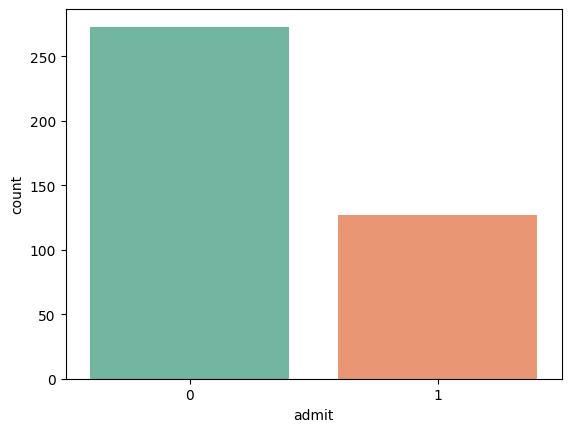

In [43]:
sns.countplot(x = 'admit', data = df, palette = 'Set2')

<Axes: xlabel='gender', ylabel='count'>

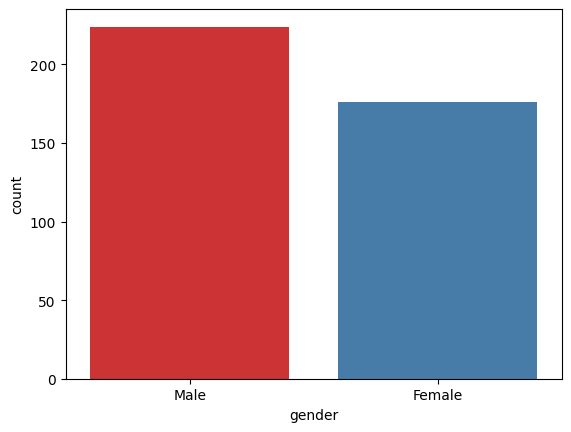

In [44]:
sns.countplot(x = 'gender', data = df, palette = 'Set1')

In [45]:
df_score = ['gre','gpa']

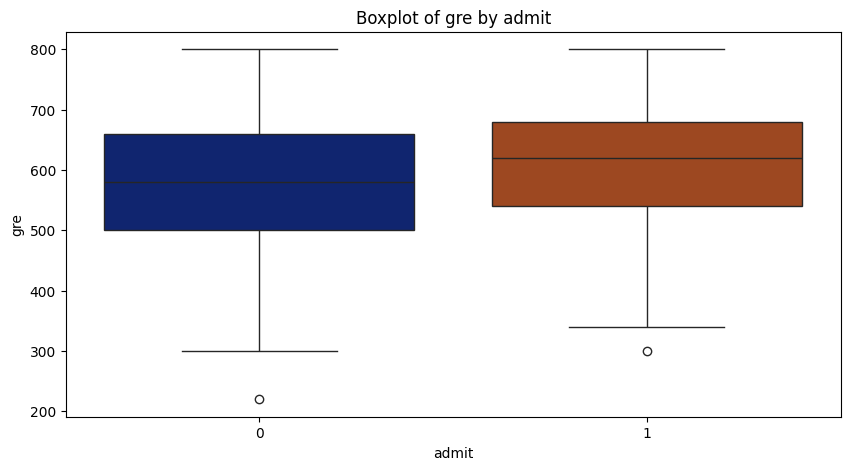

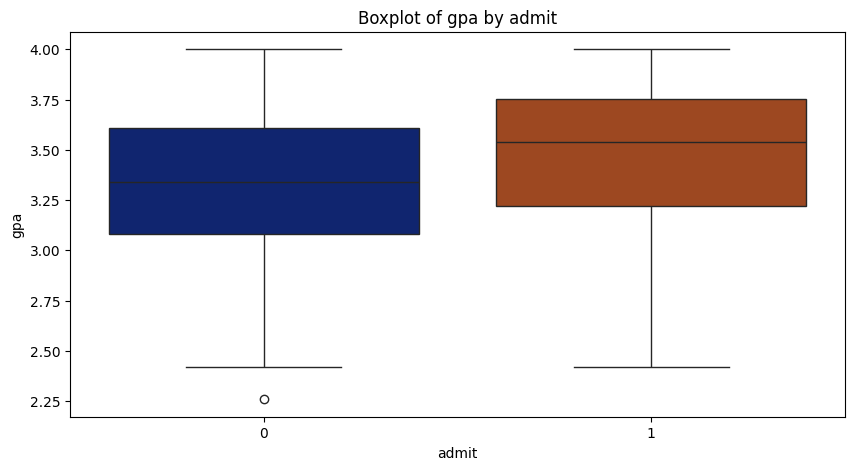

In [46]:
for col in df_score:
  plt.figure(figsize = (10,5))
  sns.boxplot(x = 'admit', y = col, data = df, palette = 'dark')
  plt.title(f'Boxplot of {col} by admit')
  plt.show()

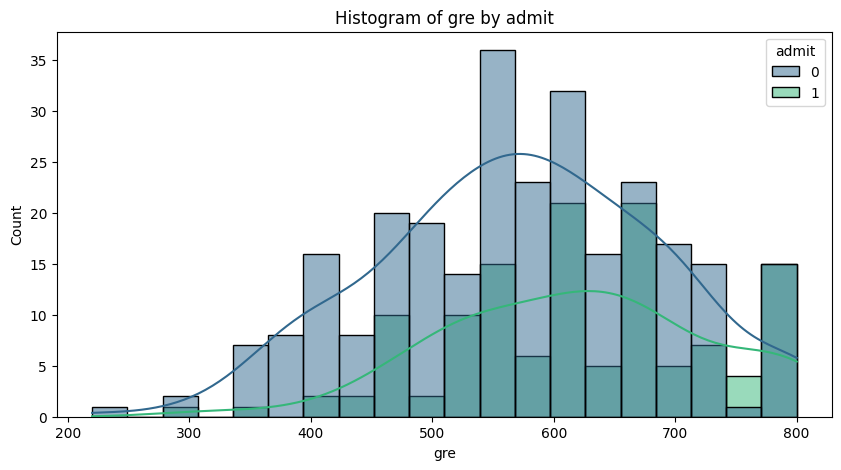

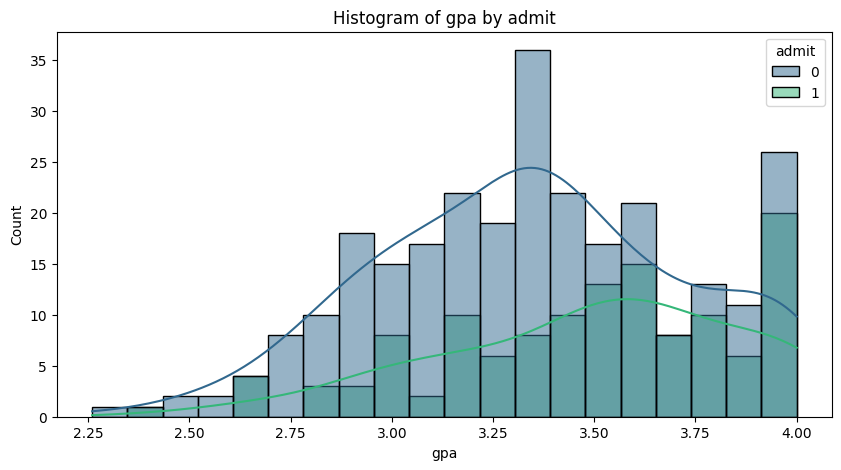

In [47]:
for col in df_score:
  plt.figure(figsize = (10,5))
  sns.histplot(x = col, data = df, hue = 'admit',palette = 'viridis',kde = True, bins = 20)
  plt.title(f'Histogram of {col} by admit')
  plt.show()

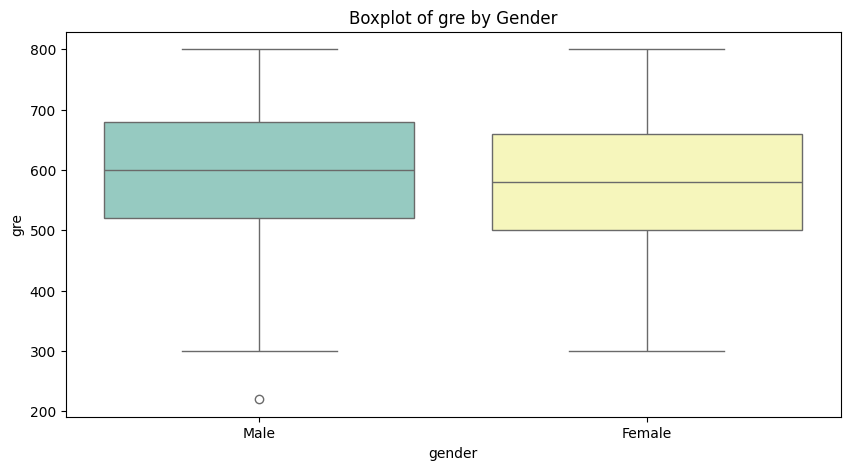

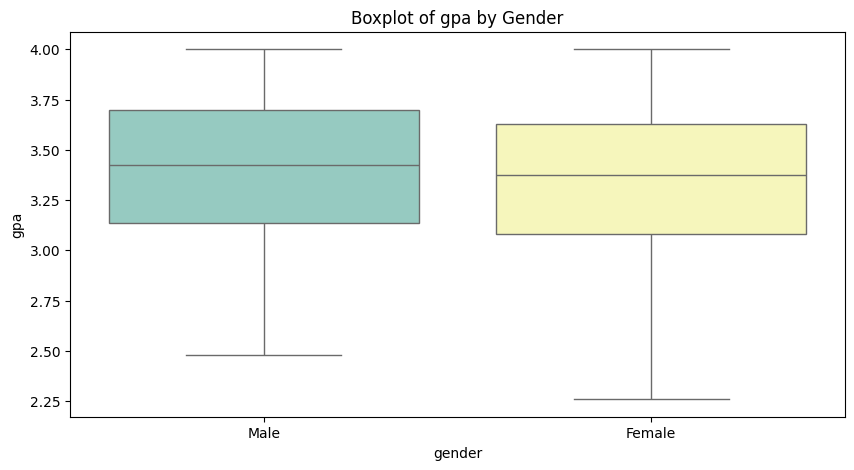

In [48]:
for col in df_score:
  plt.figure(figsize = (10,5))
  sns.boxplot(x = 'gender', y = col, data = df, palette = 'Set3')
  plt.title(f'Boxplot of {col} by Gender')
  plt.show()

In [49]:
# Correlation
cor = df.corr(numeric_only=True)

<Axes: >

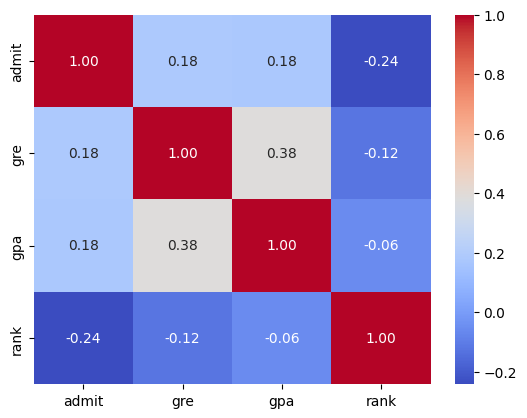

In [50]:
sns.heatmap(cor, annot = True, cmap = 'coolwarm',fmt = '.2f')

# Building the Model

In [51]:
df.head()

,admit,gre,gpa,rank,gender
0,1,660,3.67,3,Male
1,1,800,4.00,1,Female
2,1,640,3.19,4,Male
3,1,760,3.00,2,Male
4,1,560,2.98,1,Female


In [52]:
# Converting Categorical column in numerical form
df['gender'] = df['gender'].map({'Male': 1 , 'Female' : 0})

In [55]:
df.head()

,admit,gre,gpa,rank,gender
0,1,660,3.67,3,1
1,1,800,4.00,1,0
2,1,640,3.19,4,1
3,1,760,3.00,2,1
4,1,560,2.98,1,0


In [57]:
# Segregating the Feature and Target variable
x = df.drop('admit', axis = 1)
y = df['admit']

# Building the Prediction Model
## Logistic Regression using Sklearn

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_curve, roc_auc_score

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((280, 4), (120, 4), (280,), (120,))

In [63]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [64]:
y_pred = log.predict(x_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70        73
           1       0.47      0.30      0.36        47

    accuracy                           0.59       120
   macro avg       0.55      0.54      0.53       120
weighted avg       0.57      0.59      0.57       120



<Axes: >

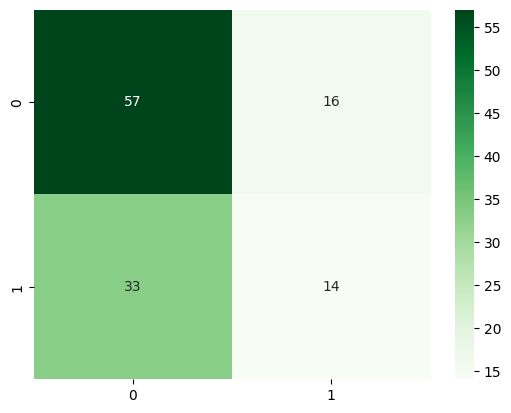

In [67]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Greens', fmt = 'd')

In [70]:
roc_auc_score(y_test, y_pred)

0.5393471291168754

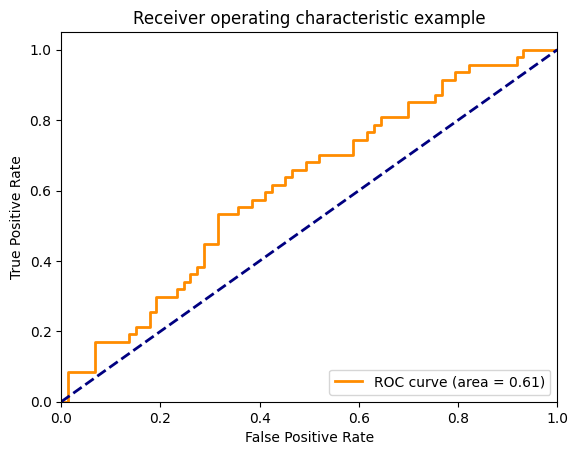

In [74]:

fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# Logistic Regression using Statsmodel

In [78]:
import statsmodels.api as sm

# Add a constant term to the predictor variables
x_train_sm = sm.add_constant(x_train)

# Fit the logistic regression model
log_sm = sm.Logit(y_train, x_train_sm).fit()

# Print the summary of the model
print(log_sm.summary())

# Make predictions on the test set
x_test_sm = sm.add_constant(x_test)
y_pred_sm = log_sm.predict(x_test_sm)

# Convert probabilities to class predictions (e.g., using a threshold of 0.5)
y_pred_class_sm = (y_pred_sm > 0.5).astype(int)

# Evaluate the model (e.g., using accuracy, classification report, etc.)
print(classification_report(y_test, y_pred_class_sm))


Optimization terminated successfully.
         Current function value: 0.503435
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      275
Method:                           MLE   Df Model:                            4
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                  0.1585
Time:                        03:29:42   Log-Likelihood:                -140.96
converged:                       True   LL-Null:                       -167.52
Covariance Type:            nonrobust   LLR p-value:                 8.091e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0248      1.498     -1.351      0.177      -4.961       0.912
gre            0.0036      0.

In [83]:
# Create a DataFrame with actual and predicted values along with features
results_df = x_test.copy()
results_df['actual_admit'] = y_test
results_df['predicted_admit'] = y_pred

# Display the DataFrame
results_df.head()


,gre,gpa,rank,gender,actual_admit,predicted_admit
209,340,2.92,3,1,0,0
280,340,2.90,1,0,0,0
33,740,2.97,2,1,1,1
210,520,2.85,3,1,0,0
93,400,3.15,2,1,1,0


# Key Takeways

 - Confusion Matrix: A table used to describe the performance of a classification model.
 - Accuracy: The overall correctness of the model (TP + TN) / (TP + TN + FP + FN).
 - Precision: The proportion of true positive predictions out of all positive predictions (TP / (TP + FP)).
 - Recall (Sensitivity): The proportion of true positive predictions out of all actual positive instances (TP / (TP + FN)).
 - F1-Score: The harmonic mean of precision and recall, a balanced measure (2 * (Precision * Recall) / (Precision + Recall)).
 - Specificity: The proportion of true negative predictions out of all actual negative instances (TN / (TN + FP)).
 - ROC Curve: A graphical plot showing the performance of a binary classifier at various thresholds.
 - AUC: The Area Under the ROC Curve, a measure of the overall performance of a classifier.
 - FPR: The proportion of negative instances incorrectly classified as positive (FP / (FP + TN)).
 - TPR: The proportion of positive instances correctly classified as positive (TP / (TP + FN)).